In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
print(os.getcwd())

In [2]:
data = sio.loadmat('./data/gait_recording_080624_walk2.mat')
insoleAll_l = data['insoleAll_l'].astype(np.float64)
insoleAll_r = data['insoleAll_r'].astype(np.float64)
t_insole_l = data['t_insole_l'].astype(np.float64)
t_insole_r = data['t_insole_r'].astype(np.float64)

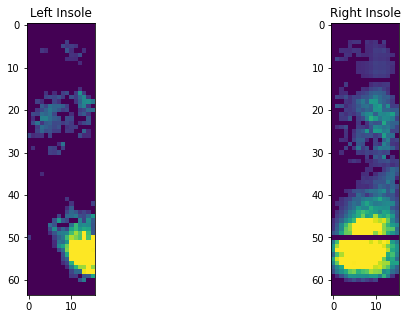

In [4]:


# Assuming 'insoleAll_l' and 'insoleAll_r' are NumPy arrays and 'i' is the index
# Left Insole Heatmap
insole_l = insoleAll_l[0]
img_l = np.reshape(insole_l, (64,16), order = 'F')

# Right Insole Heatmap
insole_r = insoleAll_r[0]
img_r = np.reshape(insole_r, (64,16), order = 'F')

# Flip the right insole image
img_r = np.fliplr(img_r)

# Flip the top 32 rows of each 
img_l[:32,] = np.flipud(img_l[:32,])
img_r[:32,] = np.flipud(img_r[:32,])

# Plotting the heatmaps
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left Insole
axs[0].imshow(img_l)
axs[0].set_title("Left Insole")

# Right Insole
axs[1].imshow(img_r)
axs[1].set_title("Right Insole")

plt.show()


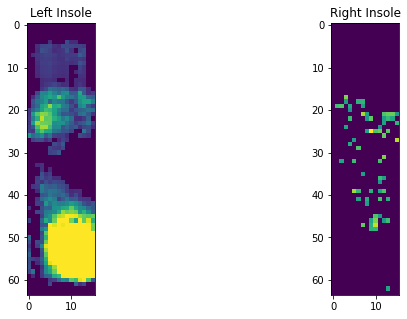

In [5]:

from matplotlib.animation import FuncAnimation


# Assuming 'insoleAll_l' and 'insoleAll_r' are NumPy arrays
# For example, they should have shape (num_frames, 1024) for 64x16 heatmaps per frame
num_frames = 300  # Number of frames in your data

# Set up the figure and axis for both left and right insoles
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the initial heatmap plots for both left and right insoles
img_l = axs[0].imshow(np.zeros((64, 16)), cmap='viridis')
axs[0].set_title("Left Insole")

img_r = axs[1].imshow(np.zeros((64, 16)),cmap='viridis')
axs[1].set_title("Right Insole")

# Function to update the heatmaps for each frame
def update(frame):
    # Left Insole Heatmap
    insole_l = insoleAll_l[frame]  # Get the left insole data for current frame
    img_l_data = np.reshape(insole_l, (64, 16), order='F')
    
    # Right Insole Heatmap
    insole_r = insoleAll_r[frame]  # Get the right insole data for current frame
    img_r_data = np.reshape(insole_r, (64, 16), order='F')
    img_r_data = np.fliplr(img_r_data)  # Flip the right insole image left-right
    
    # Flip the top 32 rows of each 
    img_l_data[:32,] = np.flipud(img_l_data[:32,])
    img_r_data[:32,] = np.flipud(img_r_data[:32,])

    # Update heatmap data for each subplot
    axs[0].imshow(img_l_data)
    axs[1].imshow(img_r_data)

    return img_l, img_r

# Create the animation using FuncAnimation
anim = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)

# Display the animation
anim.save('walking_anim.mp4', writer = 'ffmpeg', fps = 10) 